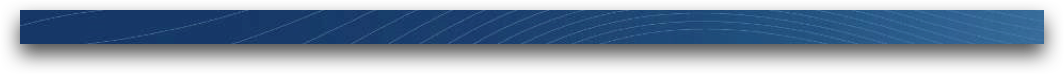

#### <font color='blue'>自然語言實作 第13週</font>

# <font color='blue'>書信寫作的常用同義詞、詞彙束，例句</font>

### 　　國立清華大學 資工系計算語言學教授

### 　　張俊盛

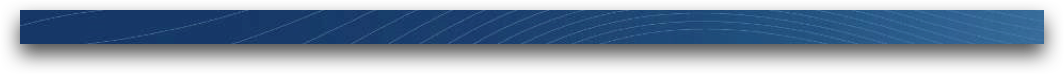

# 　<font color='blue'>本週課程大綱</font>

## 　1. 計算全書關鍵詞

## 　2. 計算各章的關鍵詞

## 　3. 計算各章的詞彙束（關鍵片語）

## 　4. 做各章關鍵詞的 cluster analysis （利用 Linggle 的 A and B 查詢） 

## 　5. 顯示各章的關鍵詞 cluster、詞彙束、例句

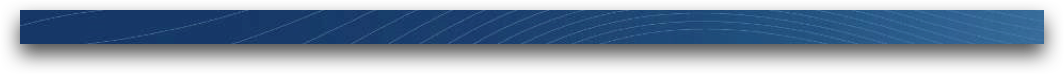

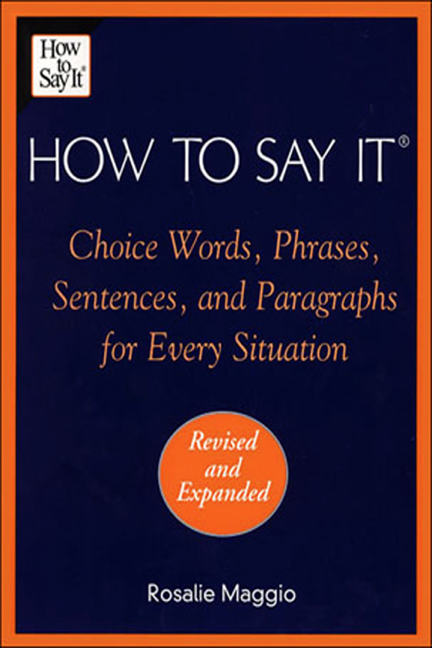

## 　1. 計算語料庫特徵關鍵詞


References

1. Paquot, Magali, and Yves Bestgen. "Distinctive words in academic writing: A comparison of three statistical tests for keyword extraction." Corpora: Pragmatics and discourse. Brill Rodopi, 2009. 247-269.

In [1]:
import re, math
from collections import defaultdict
import nltk, pickle
import pprint
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

def words(text): return re.findall("([a-z'-]+|[0-9]+)", text.lower())

count_web1t = [ line.strip().split('\t') for line in open('count_1w.txt').readlines() ]

count_web1t = dict([ (word, int(count)) for word, count in count_web1t ])

count_how_to = defaultdict(lambda: 0)

chapterno = 1
for chapter in open('how.to.say.it.(raw).txt').read().split('<chapter>')[1:-1]:
    sentences = sent_detector.tokenize(chapter[chapter.index('\nPHRASES\n')+len('\nPHRASES\n'):])
    for sentence in sentences:
        for word in words(sentence):
            count_how_to[word] += 1
    chapterno += 1
    
#segmenter_file = open('english.pickle', 'r')
#sentence_segmenter = pickle.Unpickler(sent_detector).load()
    
def is_key(word, count, total):
    if word not in count_web1t: return False
    rate = math.log10(count)-math.log10(total)-(math.log10(count_web1t[word])-12)
    return rate >= 1
    
total = sum(count_how_to.values())
keywords = [ (word, count) for word, count in count_how_to.items() if is_key(word, count, total) and count>3]
print ('There are', len(keywords), 'keywords in %s.'%('how.to.say.it.bundles.%s.%s+.txt'%(NGRAM_DEGREE,MIN_COUNT)))
#with open('how.to.say.it.bundles.%s.%s+.txt'%(NGRAM_DEGREE,MIN_COUNT), 'w') as outfile:
for word, count in sorted(keywords, key=lambda x: -x[1]):
    print ('\t'.join([word, str(count)]))


NameError: name 'NGRAM_DEGREE' is not defined

## 　2. 計算詞彙束（關鍵片語）

In [2]:
import re
def words(text): return re.findall("([a-zA-Z'-]+|[0-9]+)", text)

count_chapter = defaultdict(lambda: defaultdict(lambda: 0))

## 　3. 計算各章的詞彙束（關鍵片語）
### 　　各章關鍵片語的條件，次數出現超過平均值的章節
### 　　例如 accept 出現在各章的次數 (1, 8), (2, 2), (15, 1)
### 　　8 > (8+2+1)/3 所以 accept 是第１章的關鍵詞

In [3]:
import re
def words(text): return re.findall("([a-zA-Z'-]+|[0-9]+)", text)
def ngrams(tokens, n=4): return [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n) ]  

In [4]:
chapters = '''01. Accept; 02. Confirm; 03. Adjust; 04. Advice; 05. Birthday; 06. Announce; 07. Apologize; 08. Apply; 09. Appointment; 10. Appreciate; 11. Late; 12. Collect; 13. Complaint; 14. Congrat; 15. Contract; 16. CoverLetters; 17. Credit; 18. Disagree; 19. ToEditor; 20. E-mail; 21. Employ; 22. Family; 23. Fax; 24. Follow-up; 25. RaiseFund; 26. Get-well; 27. Goodwill; 28. Holiday; 29. Instruct; 30. Introduce; 31. Invite; 32. Love; 33. Memos; 34. ToNeighbor; 35. Order; 36. Club; 37. Query; 38. Refer; 39. Refuse; 40. Report; 41. Request; 42. Respond; 43. Resume; 44. Sales; 45. Sensitive; 46. Sympathy; 47. Thank-you; 48. Travel; 49. Wedding; 50. Welcome'''
chapters = [ x.split() for x in chapters.split('; ')]
chaptername = dict([ (int(x[:-1]), x+y) for x, y in chapters ])

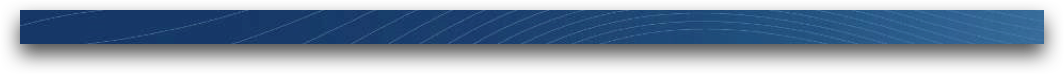

## 　4. 做各章關鍵詞的 cluster analysis （利用 Linggle 的 A and B 查詢） 


In [9]:
from linggle import Linggle
from collections import defaultdict
import pprint

linggle = Linggle()

def ngramcount(query):
    return linggle[query]

accept_words = '''accept invite approve certainly delighted
gratifying pleased pleasure
satisfying thoughtful thrilled
touched welcome willing'''.split()
#accept_words = '/'.join(accept_words)
print (accept_words)
print ()

and_grams = ngramcount('%s and %s'%('/'.join(accept_words), '/'.join(accept_words)))
pprint.pprint (and_grams)

['accept', 'invite', 'approve', 'certainly', 'delighted', 'gratifying', 'pleased', 'pleasure', 'satisfying', 'thoughtful', 'thrilled', 'touched', 'welcome', 'willing']

[['accept and approve', 5603],
 ['invite and welcome', 2791],
 ['thrilled and delighted', 2612],
 ['approve and accept', 2562],
 ['welcome and invite', 2064],
 ['accept and welcome', 1919],
 ['pleased and delighted', 1854],
 ['welcome and accept', 1290],
 ['invite and accept', 1176],
 ['delighted and pleased', 668],
 ['delighted and thrilled', 607],
 ['touched and pleased', 594],
 ['pleasure and pleasure', 588],
 ['pleased and touched', 477],
 ['accept and accept', 383],
 ['welcome and welcome', 370],
 ['pleased and thrilled', 364],
 ['touched and delighted', 334],
 ['satisfying and gratifying', 327],
 ['thrilled and pleased', 306],
 ['touched and thrilled', 239],
 ['thrilled and touched', 201],
 ['delighted and touched', 198],
 ['welcome and certainly', 187],
 ['gratifying and satisfying', 176],
 ['thoughtful and satis

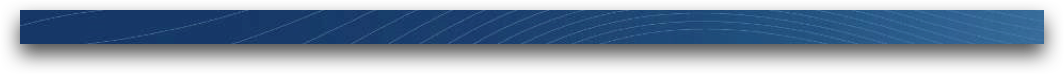

## 　5. 顯示各章的關鍵詞 cluster、詞彙束、例句

In [ ]:
import nltk
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
for chapter in open('how.to.say.it.(raw).txt').read().split('<chapter>')[1:-1]:
    sentences = sent_detector.tokenize(chapter)
    sentences = [ sentence for sentence in sentences 
                     if sentence[0].isupper() and sentence[-1] in '?!.' ]

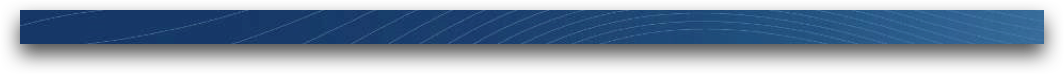
## 　在例句中，用粗體顯示詞彙束

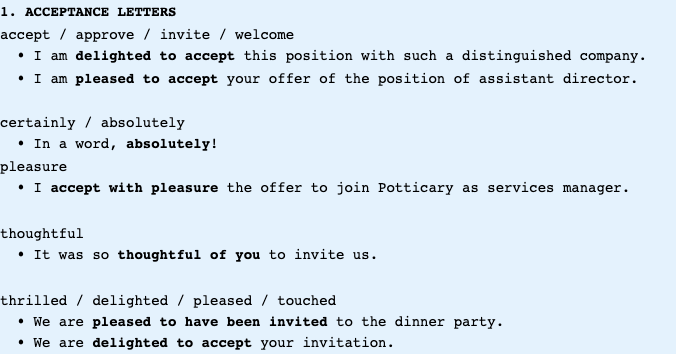

In [ ]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd("I am **delighted to accept** this position with such a distinguished company.")

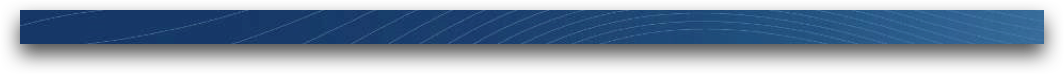

# 　<font color='blue'>本週任務</font>

## 　LEVEL A.  計算各章關鍵詞、各章詞彙束（關鍵片語）

## 　LEVEL B.  做各章關鍵詞的 cluster analysis （利用 Linggle 的 A and B 查詢） 

## 　LEVEL C.  顯示各章的關鍵詞 cluster、詞彙束、例句